In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
from datetime import datetime, timedelta
import os

In [34]:
DB = sqlite3.connect('varletablets.db')
C = DB.cursor()
sql="""SELECT * FROM tablets;"""
dfv = pd.read_sql_query(sql, con=DB)
dfv['kaina']=dfv['kaina'].astype(float)

DB = sqlite3.connect('pigutablets.db')
C = DB.cursor()
sql="""SELECT * FROM tablets;"""
dfp = pd.read_sql_query(sql, con=DB)
dfp = dfp.dropna(subset=['kaina'])
dfp['kaina'] = dfp['kaina'].apply(lambda x: str(x).replace(' ', ''))
dfp['kaina']=dfp['kaina'].astype(float)
dfv1 = dfv[['kaina', 'gamintojas']]
dfv1['pardavejas'] = 'varle.lt'
dfp1 = dfp[['kaina', 'prekės ženklas:']]
dfp1['pardavejas'] = 'pigu.lt'
dfp1.rename(columns={'prekės ženklas:': 'gamintojas'}, inplace=True)
dfpv1= pd.concat([dfv1, dfp1], axis=0, ignore_index=True)
spalvukiek = dfv1['gamintojas'].value_counts()
spalvukiek = spalvukiek[spalvukiek > 20].index
dfv1 = dfv1[dfv1['gamintojas'].isin(spalvukiek)]

spalvukiek = dfp1['gamintojas'].value_counts()
spalvukiek = spalvukiek[spalvukiek > 20].index
dfp1 = dfp1[dfp1['gamintojas'].isin(spalvukiek)]

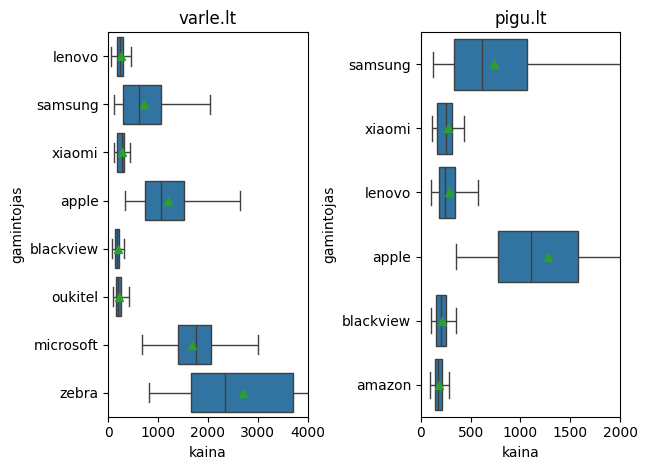

In [35]:
fig, (axis1, axis2) = plt.subplots(1,2)
sns.boxplot(data=dfv1, y='gamintojas', x='kaina', showmeans=True, showfliers=False, ax=axis1)
sns.boxplot(data=dfp1, y='gamintojas', x='kaina', showmeans=True, showfliers=False, ax=axis2)
axis1.set_title('varle.lt')
axis2.set_title('pigu.lt')
fig.tight_layout()
axis1.set_xlim(0, 4000)
axis2.set_xlim(0, 2000)
plt.show()

In [36]:
kainoshead5= dfpv1.groupby('gamintojas')['kaina'].mean().reset_index().sort_values('kaina', ascending=False).head(5)
kainostail5= dfpv1.groupby('gamintojas')['kaina'].mean().reset_index().sort_values('kaina', ascending=False).tail(5)

In [37]:
gamintojas_kaina = dfpv1.groupby('gamintojas')['kaina'].mean().reset_index().sort_values('kaina', ascending=False)
middle_index = len(gamintojas_kaina) // 2
if len(gamintojas_kaina) % 2 == 0:
    middle_5_gamintojas = gamintojas_kaina.iloc[middle_index - 3: middle_index + 2]
else:
    middle_5_gamintojas = gamintojas_kaina.iloc[middle_index - 2: middle_index + 3]

In [38]:
print(f'5 brangiausi gamintojai: {list(kainoshead5['gamintojas'])}')
print(f'5 pigiausi gamintojai: {list(kainostail5['gamintojas'])}')
print(f'5 vidutinės kainos gamintojai: {list(middle_5_gamintojas['gamintojas'])}')

5 brangiausi gamintojai: ['xplore', 'zebra', 'dell', 'honeywell', 'microsoft']
5 pigiausi gamintojai: ['hp', 'estar', 'kake make', 'denver', 'mobilis']
5 vidutinės kainos gamintojai: ['ulefone', 'adoc', 'oukitel', 'huion', 'nokia']


In [39]:
dfp2=dfp[['kaina', 'ekrano įstrižainė:', 'operatyvinė atmintis (ram):', 'vidinė atmintis:']]
dfp2['ekrano įstrižainė:']=dfp2['ekrano įstrižainė:'].apply(lambda x: str(x).replace('"',' ').split(' ')[0])
dfp2['ekrano įstrižainė:']=dfp2['ekrano įstrižainė:'].apply(lambda x: str(x).replace("''",' ').replace('”', ''))
dfp2['ekrano įstrižainė:'] = dfp2['ekrano įstrižainė:'].replace(['', 'kiti', 'None', 'nenurodyta', '27,9cm'], None)
# dfp2 = dfp2.dropna(subset=['ekrano įstrižainė:'])
dfp2['ekrano įstrižainė:']=dfp2['ekrano įstrižainė:'].astype(float)
dfp2['operatyvinė atmintis (ram):']=dfp2['operatyvinė atmintis (ram):'].apply(lambda x: str(x).replace("-",' ').replace('mb', '').replace(' ',''))
dfp2['operatyvinė atmintis (ram):']=dfp2['operatyvinė atmintis (ram):'].replace(['', 'None'], None)
dfp2['operatyvinė atmintis (ram):']=dfp2['operatyvinė atmintis (ram):'].astype(float)
dfp2['operatyvinė atmintis (ram):']=dfp2['operatyvinė atmintis (ram):'].apply(lambda x: float(x)*1000 if float(x)<100 else x)
dfp2['vidinė atmintis:']=dfp2['vidinė atmintis:'].apply(lambda x: str(x).split(' ')[0])
dfp2['vidinė atmintis:']=dfp2['vidinė atmintis:'].apply(lambda x: str(x).replace("gb",'').replace('None', '').replace('nenurodyta',''))
dfp2['vidinė atmintis:']=dfp2['vidinė atmintis:'].replace(['', 'None'], None)
dfp2['vidinė atmintis:']=dfp2['vidinė atmintis:'].astype(float)
dfp2['vidinė atmintis:']=dfp2['vidinė atmintis:'].apply(lambda x: float(x)*1000 if float(x)<3 else x)
dfv2=dfv[['kaina', 'ekrano įstrižainė', 'atmintis (ram) (gb)', 'vidinė atmintis (gb)']]
dfv2['ekrano įstrižainė']=dfv2['ekrano įstrižainė'].apply(lambda x: str(x).replace('"',' ').replace("''", " ").split(' ')[0])
dfv2['ekrano įstrižainė'] = dfv2['ekrano įstrižainė'].apply(lambda x: x.replace(',', '.'))
dfv2['ekrano įstrižainė'] = dfv2['ekrano įstrižainė'].replace(['', 'None'], None)
# dfv2 = dfv2.dropna(subset=['ekrano įstrižainė'])
dfv2['ekrano įstrižainė'] = dfv2['ekrano įstrižainė'].astype(float)
dfv2['atmintis (ram) (gb)']=dfv2['atmintis (ram) (gb)'].apply(lambda x: str(x).replace(' ', ''))
dfv2['atmintis (ram) (gb)']=dfv2['atmintis (ram) (gb)'].replace(['', 'None'], None)
dfv2['atmintis (ram) (gb)']=dfv2['atmintis (ram) (gb)'].astype(float)
dfv2['atmintis (ram) (gb)']=dfv2['atmintis (ram) (gb)'].apply(lambda x: float(x)*1000 if float(x)<100 else x)
dfv2['vidinė atmintis (gb)']=dfv2['vidinė atmintis (gb)'].apply(lambda x: str(x).replace(' ', ''))
dfv2['vidinė atmintis (gb)']=dfv2['vidinė atmintis (gb)'].replace(['', 'None'], None)
dfv2['vidinė atmintis (gb)']=dfv2['vidinė atmintis (gb)'].astype(float)


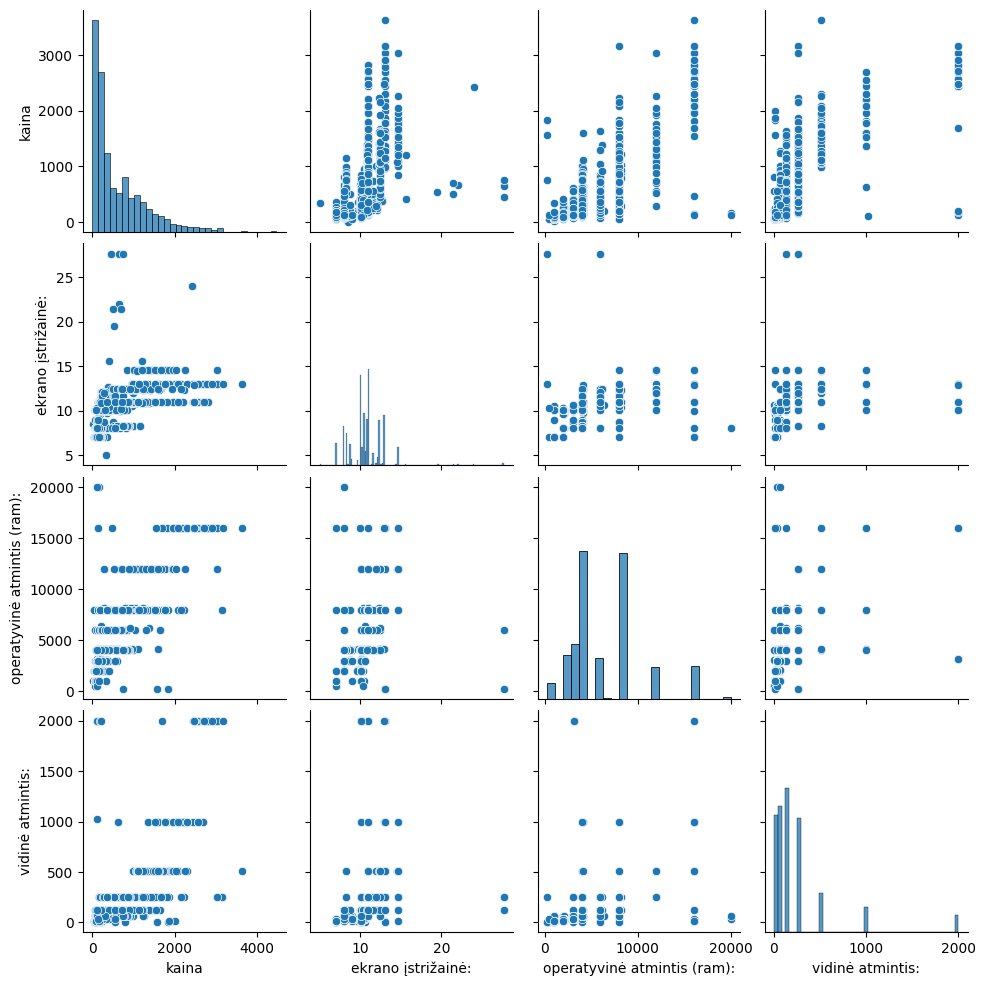

In [40]:
sns.pairplot(data=dfp2)

<Axes: >

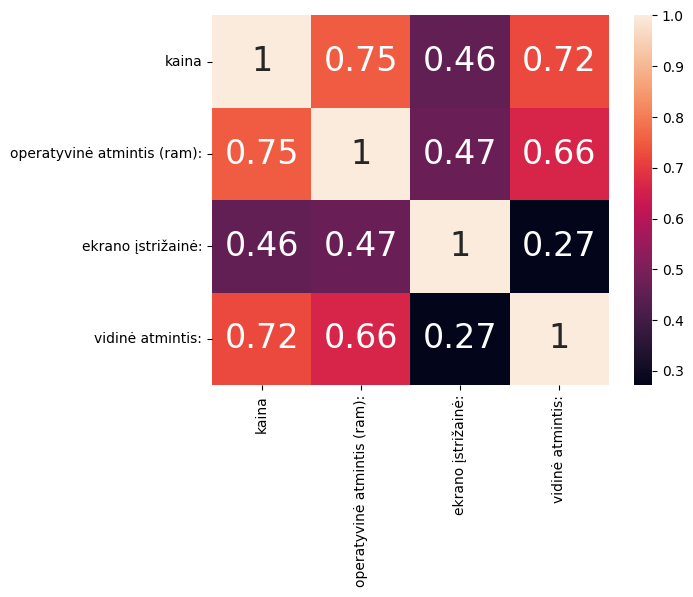

In [41]:
dt=dfp2[['kaina', 'operatyvinė atmintis (ram):', 'ekrano įstrižainė:','vidinė atmintis:']].corr(numeric_only=True)
sns.heatmap(data=dt,annot=True, annot_kws={'fontsize':24})

In [44]:
print(dt.head())
print(dt.info())

                                kaina  operatyvinė atmintis (ram):  \
kaina                        1.000000                     0.751896   
operatyvinė atmintis (ram):  0.751896                     1.000000   
ekrano įstrižainė:           0.456599                     0.470969   
vidinė atmintis:             0.722305                     0.663542   

                             ekrano įstrižainė:  vidinė atmintis:  
kaina                                  0.456599          0.722305  
operatyvinė atmintis (ram):            0.470969          0.663542  
ekrano įstrižainė:                     1.000000          0.272225  
vidinė atmintis:                       0.272225          1.000000  
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, kaina to vidinė atmintis:
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   kaina                        4 non-null      float64
 1   operatyvinė atmi